In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


df = pd.read_csv('/content/model_2017_ST4000DM000.csv')  # You might need to adjust the delimiter

# Separate data into Class 0 and Class 1
class_0 = df[df['failure'] == 0]
class_1 = df[df['failure'] == 1]

# Drops rows with any NaN values
df.dropna(inplace=True)

df.fillna(df.mean(numeric_only=True), inplace=True)
df_filled = df.fillna(0)


# Fill missing values with 0 for both classes
class_0_filled = class_0.fillna(0)
class_1_filled = class_1.fillna(0)

# Select only the numeric columns (excluding 'date', 'serial_number', 'model', etc.)
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate the mean for each class
mean_class_0 = class_0[numeric_columns.columns].mean()
mean_class_1 = class_1[numeric_columns.columns].mean()

# Calculate the standard deviation for each class
std_class_0 = class_0[numeric_columns.columns].std()
std_class_1 = class_1[numeric_columns.columns].std()

# Display the mean vectors
print("Mean Vector for Class 0:")
print(mean_class_0)
print("\nMean Vector for Class 1:")
print(mean_class_1)

# Display the standard deviation vectors
print("\nSpread (Standard Deviation) for Class 0:")
print(std_class_0)
print("\nSpread (Standard Deviation) for Class 1:")
print(std_class_1)

# Calculate the Euclidean distance between mean vectors
distance = np.linalg.norm(mean_class_0 - mean_class_1)



Mean Vector for Class 0:
capacity_bytes          4.000790e+12
failure                 0.000000e+00
smart_1_normalized      1.153165e+02
smart_1_raw             1.223628e+08
smart_2_normalized               NaN
                            ...     
smart_252_raw                    NaN
smart_254_normalized             NaN
smart_254_raw                    NaN
smart_255_normalized             NaN
smart_255_raw                    NaN
Length: 92, dtype: float64

Mean Vector for Class 1:
capacity_bytes          4.000790e+12
failure                 1.000000e+00
smart_1_normalized      1.151872e+02
smart_1_raw             1.221156e+08
smart_2_normalized               NaN
                            ...     
smart_252_raw                    NaN
smart_254_normalized             NaN
smart_254_raw                    NaN
smart_255_normalized             NaN
smart_255_raw                    NaN
Length: 92, dtype: float64

Spread (Standard Deviation) for Class 0:
capacity_bytes          0.000000e+00
fa

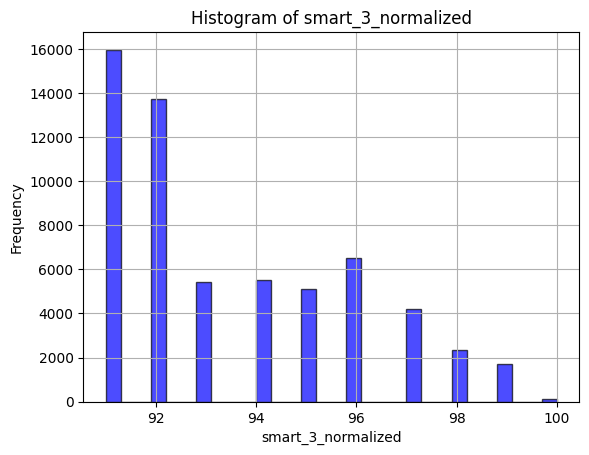

Mean of smart_3_normalized: 93.48009101251422
Variance of smart_3_normalized: 5.625403295921037


<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your large dataset into a DataFrame (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/model_2017_ST4000DM000.csv')

# Choose the feature for which you want to observe the density pattern
selected_feature = 'smart_3_normalized'

# Remove any rows with missing values in the selected feature
df_cleaned = df.dropna(subset=[selected_feature])

# Define the number of bins for the histogram (adjust as needed)
num_bins = 30

# Plot the histogram
plt.hist(df_cleaned[selected_feature], bins=num_bins, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel(selected_feature)
plt.ylabel('Frequency')
plt.title(f'Histogram of {selected_feature}')
plt.grid(True)

# Show the plot
plt.show()

# Calculate the mean and variance of the selected feature
mean_value = df_cleaned[selected_feature].mean()
variance_value = df_cleaned[selected_feature].var()

print(f'Mean of {selected_feature}: {mean_value}')
print(f'Variance of {selected_feature}: {variance_value}')

plt.savefig("fig1.jpg")


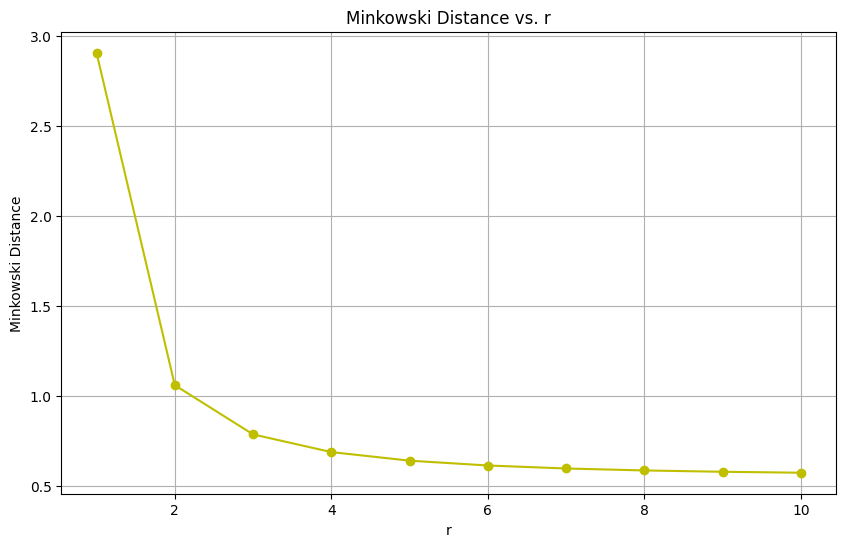

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for demonstration purposes
np.random.seed(0)
vector_1 = np.random.rand(10)  # Replace this with your actual data
vector_2 = np.random.rand(10)  # Replace this with your actual data

# Create an array of r values from 1 to 10
r_values = np.arange(1, 11)

# Initialize an empty list to store Minkowski distances
distances = []

# Calculate Minkowski distance for each value of r
for r in r_values:
    distance = np.power(np.sum(np.abs(vector_1 - vector_2) ** r), 1/r)
    distances.append(distance)

# Create a plot of distances vs. r values with lines connecting the markers
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o', linestyle='-', color='y')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()


In [5]:
#A4
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

X = df[['smart_9_normalized','smart_1_normalized','smart_7_normalized']]  # Replace with your feature columns
y = df['failure']  # Replace with your target column

# Split the dataset into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now, X_train and y_train contain the training data, and X_test and y_test contain the test data.

#A5
# Replace '3' with your desired value of k
k = 3

# Create a k-NN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
neigh.fit(X_train, y_train)

#A6
accuracy = neigh.score(X_test, y_test)

print(f"Accuracy on the test set: {accuracy:.2f}")

#A7

# Assuming X_train and y_train are your training data
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# You can provide dummy feature names to avoid the warning
feature_names = ['smart_9_normalized','smart_1_normalized','smart_7_normalized']  # Adjust this as needed
X_test_with_feature_names = pd.DataFrame(X_test, columns=feature_names)

# Predict using the test data with feature names
knn_predictions = knn_classifier.predict(X_test_with_feature_names)
print(knn_predictions)




Accuracy on the test set: 0.93
[0 0 0 ... 0 0 0]


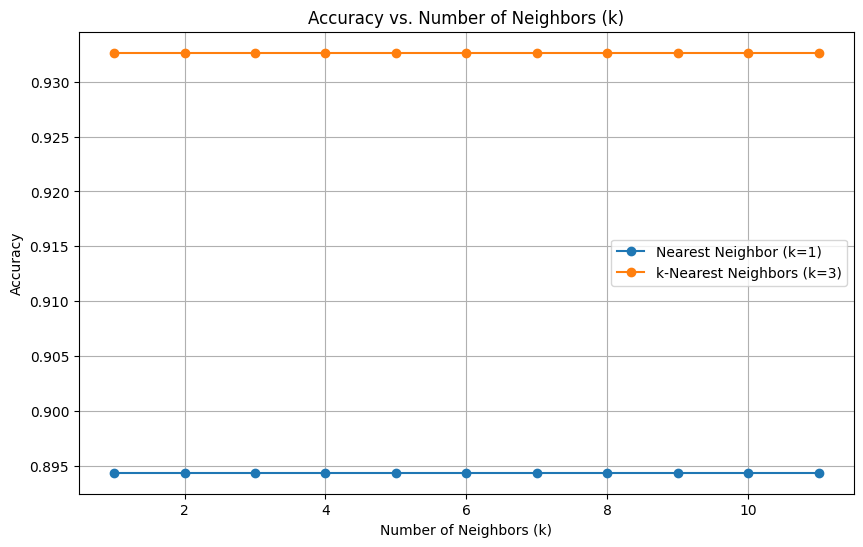

In [ ]:
#A8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your data in X and y
# X should be a 2D array-like object with features, and y should be labels

# Split your data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of k values to test
k_values = range(1, 12)

# Initialize lists to store accuracy scores
accuracy_scores_nn = []
accuracy_scores_knn = []

for k in k_values:
    # Train the Nearest Neighbor (k=1) classifier
    nn_classifier = KNeighborsClassifier(n_neighbors=1)
    nn_classifier.fit(X_train, y_train)
    nn_predictions = nn_classifier.predict(X_test)
    accuracy_nn = accuracy_score(y_test, nn_predictions)
    accuracy_scores_nn.append(accuracy_nn)

    # Train the k-Nearest Neighbors (k=3) classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    knn_classifier.fit(X_train, y_train)
    knn_predictions = knn_classifier.predict(X_test)
    accuracy_knn = accuracy_score(y_test, knn_predictions)
    accuracy_scores_knn.append(accuracy_knn)

# Create a plot to compare accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores_nn, marker='o', label='Nearest Neighbor (k=1)')
plt.plot(k_values, accuracy_scores_knn, marker='o', label='k-Nearest Neighbors (k=3)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have your data in X and y
# X should be a 2D array-like object with features, and y should be labels

# Split your data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the k-Nearest Neighbors (k=3) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Predict the labels for the training and test data
train_predictions = knn_classifier.predict(X_train)
test_predictions = knn_classifier.predict(X_test)

# Calculate the confusion matrix for training and test data
train_confusion_matrix = confusion_matrix(y_train, train_predictions)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate classification report for training and test data
train_classification_report = classification_report(y_train, train_predictions, zero_division=0)
test_classification_report = classification_report(y_test, test_predictions, zero_division=0)

# Output the results
print("Confusion Matrix for Training Data:")
print(train_confusion_matrix)
print("\nClassification Report for Training Data:")
print(train_classification_report)

print("\nConfusion Matrix for Test Data:")
print(test_confusion_matrix)
print("\nClassification Report for Test Data:")
print(test_classification_report)


Confusion Matrix for Training Data:
[[56673   686]
 [ 3290   384]]

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     57359
           1       0.36      0.10      0.16      3674

    accuracy                           0.93     61033
   macro avg       0.65      0.55      0.56     61033
weighted avg       0.91      0.93      0.92     61033


Confusion Matrix for Test Data:
[[24314   333]
 [ 1429    81]]

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     24647
           1       0.20      0.05      0.08      1510

    accuracy                           0.93     26157
   macro avg       0.57      0.52      0.52     26157
weighted avg       0.90      0.93      0.91     26157

